# **Import Library**

In [230]:
#Import library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# **Loading Dataset**

In [231]:
#Memanggil dataset menggunakan link
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1v-6eAqG5y4aaHAtx0iWB4MdfbbZygHn-')

In [232]:
#Menampilkan 5 baris teratas dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [233]:
#Menampilkan 5 baris terakhir dataset
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [234]:
#Melihat informasi singkat dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Missing Value**

In [235]:
#Cek missing value per-kolom
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


# **Hapus Kolom**

In [236]:
#Menghapus kolom yang tidak digunakan
df = df.drop(columns=['id', 'Unnamed: 32'])

# **Data Analysis**

In [237]:
#Melihat statistik deskriptif dataset
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# **Menangani Outlier**

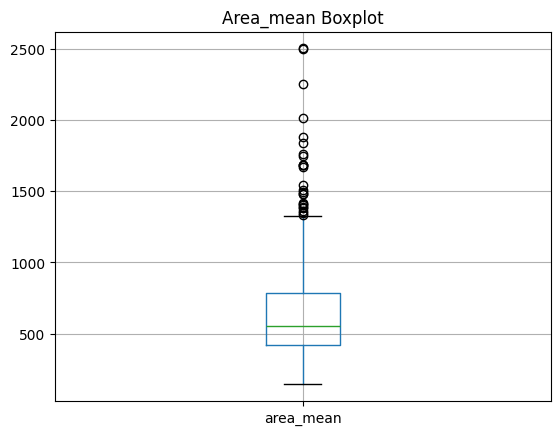

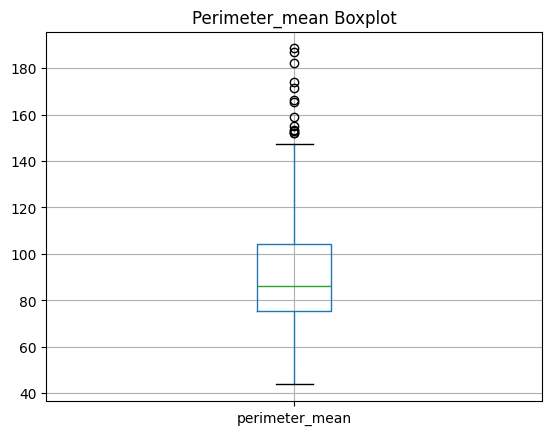

In [238]:
#Melihat oulier menggunakan boxplot
df.boxplot(column=['area_mean'])
plt.title('Area_mean Boxplot')
plt.show()

df.boxplot(column=['perimeter_mean'])
plt.title('Perimeter_mean Boxplot')
plt.show()

In [239]:
#Hitung Q1, Q2, dan Q3 untuk area_mean
Q1_area_mean = df['area_mean'].quantile(0.25)
Q3_area_mean = df['area_mean'].quantile(0.75)
IQR_area_mean = Q3_area_mean - Q1_area_mean
lower_area_mean = Q1_area_mean - 1.5 * IQR_area_mean
upper_area_mean = Q3_area_mean + 1.5 * IQR_area_mean

#Deteksi outlier
outliers_area_mean_iqr = df[(df['area_mean'] < lower_area_mean) | (df['area_mean'] > upper_area_mean)]

#Tampilkan ringkasan
print("Ringkasan Oulier area_mean (IQR)")
print("Q1:", Q1_area_mean)
print("Q3:", Q3_area_mean)
print("IQR:", IQR_area_mean)
print("Batas bawah:", lower_area_mean)
print("Batas atas:", upper_area_mean)
print("Jumlah outlier:", len(outliers_area_mean_iqr))
print()

Ringkasan Oulier area_mean (IQR)
Q1: 420.3
Q3: 782.7
IQR: 362.40000000000003
Batas bawah: -123.30000000000001
Batas atas: 1326.3000000000002
Jumlah outlier: 25



In [240]:
#Hitung Q1, Q2, dan Q3 untuk perimeter_mean
Q1_perimeter_mean = df['perimeter_mean'].quantile(0.25)
Q3_perimeter_mean = df['perimeter_mean'].quantile(0.75)
IQR_perimeter_mean = Q3_perimeter_mean - Q1_perimeter_mean
lower_perimeter_mean = Q1_perimeter_mean - 1.5 * IQR_perimeter_mean
upper_perimeter_mean = Q3_perimeter_mean + 1.5 * IQR_perimeter_mean

#Deteksi outlier
outliers_perimeter_mean_iqr = df[(df['perimeter_mean'] < lower_perimeter_mean) | (df['perimeter_mean'] > upper_perimeter_mean)]

#Tampilkan ringkasan
print("Ringkasan Oulier perimeter_mean (IQR)")
print("Q1:", Q1_perimeter_mean)
print("Q3:", Q3_perimeter_mean)
print("IQR:", IQR_perimeter_mean)
print("Batas bawah:", lower_perimeter_mean)
print("Batas atas:", upper_perimeter_mean)
print("Jumlah outlier:", len(outliers_perimeter_mean_iqr))
print()

Ringkasan Oulier perimeter_mean (IQR)
Q1: 75.17
Q3: 104.1
IQR: 28.929999999999993
Batas bawah: 31.775000000000013
Batas atas: 147.49499999999998
Jumlah outlier: 13



In [241]:
#Menangani oulier menggunakan Winsorizing (area_mean)
#Batasi nilai area di luar IQR
df['area_mean'] = df['area_mean'].clip(lower=lower_area_mean, upper=upper_area_mean)
print("Jumlah data sebelum winsor :", len(df))
print("Jumlah data sesudah winsor :", len(df))
print("Catatan: jumlah data tetap sama, hanya nilai outlier yang digeser ke batas IQR.")

Jumlah data sebelum winsor : 569
Jumlah data sesudah winsor : 569
Catatan: jumlah data tetap sama, hanya nilai outlier yang digeser ke batas IQR.


In [242]:
#Menangani oulier menggunakan Winsorizing (perimeter_mean)
#Batasi nilai perimeter di luar IQR
df['perimeter_mean'] = df['perimeter_mean'].clip(lower=lower_perimeter_mean, upper=upper_perimeter_mean)
print("Jumlah data sebelum winsor :", len(df))
print("Jumlah data sesudah winsor :", len(df))
print("Catatan: jumlah data tetap sama, hanya nilai outlier yang digeser ke batas IQR.")

Jumlah data sebelum winsor : 569
Jumlah data sesudah winsor : 569
Catatan: jumlah data tetap sama, hanya nilai outlier yang digeser ke batas IQR.


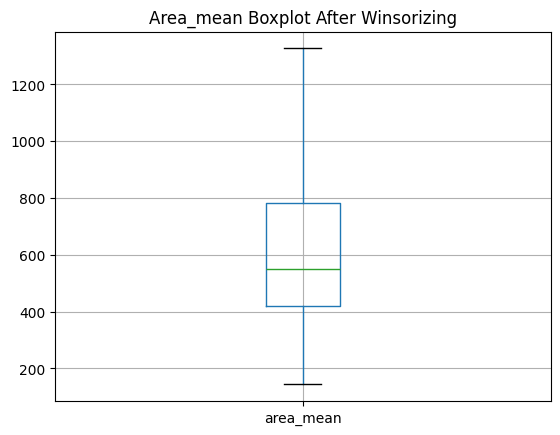

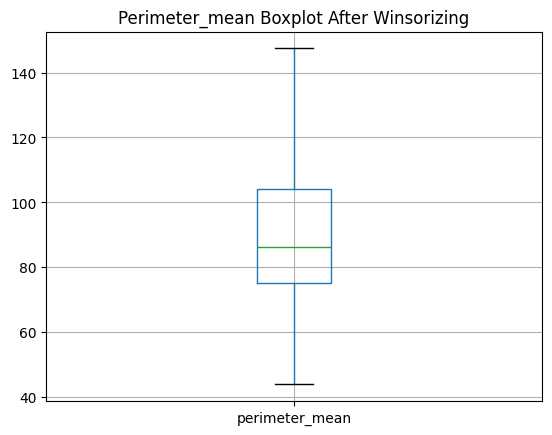

In [243]:
#Melihat oulier menggunakan boxplot setelah winsorizing
df.boxplot(column=['area_mean'])
plt.title('Area_mean Boxplot After Winsorizing')
plt.show()

df.boxplot(column=['perimeter_mean'])
plt.title('Perimeter_mean Boxplot After Winsorizing')
plt.show()

## **Value Counts**

In [244]:
#Menampilkan nilai pada kolom diagnosis
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


## **Encoding Kategorikal**

In [245]:
#Ubah kategori menjadi numerik
replacements = {
    'diagnosis': {'B': 0, 'M': 1}
}

df.replace(replacements, inplace=True)

/tmp/ipython-input-2937172012.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(replacements, inplace=True)


In [246]:
#Menampilkan data berdasarkan nomor indeks
df.iloc[0:5]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Separating Data**

In [247]:
#Membuat fitur (X) dan target (Y)
X = df.drop(columns='diagnosis', axis=1)
Y = df['diagnosis']

In [248]:
#Menampilkan 5 baris teratas kolom fitur
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [249]:
#Menampilkan 5 baris teratas kolom target
Y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


# **Splitting Data**

In [250]:
#Membagi data menjadi data training dan data testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [251]:
#Melihat dimensi data pada kolom fitur
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


# **Scaling Data**

In [252]:
#Menstandarkan data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model Naive Bayes Classification**

In [253]:
#Membuat model Gaussian Naive Bayes
gnb = GaussianNB()

#Melatih model Gaussian Naive Bayes menggunakan data training
gnb.fit(X_train_scaled, Y_train)

GaussianNB()

# **Accuracy Score & Evaluasi**

In [254]:
#Prediksi pada model
train_pred_gnb = gnb.predict(X_train_scaled)
test_pred_gnb = gnb.predict(X_test_scaled)

In [255]:
#Menampilkan akurasi pada model
print("Akurasi pada data training:", accuracy_score(Y_train, train_pred_gnb))
print("Akurasi pada data testing:", accuracy_score(Y_test, test_pred_gnb))

Akurasi pada data training: 0.9406593406593406
Akurasi pada data testing: 0.9649122807017544


In [256]:
#Melihat nilai unik pada kolom diagnosis
df['diagnosis'].unique()

array([1, 0])

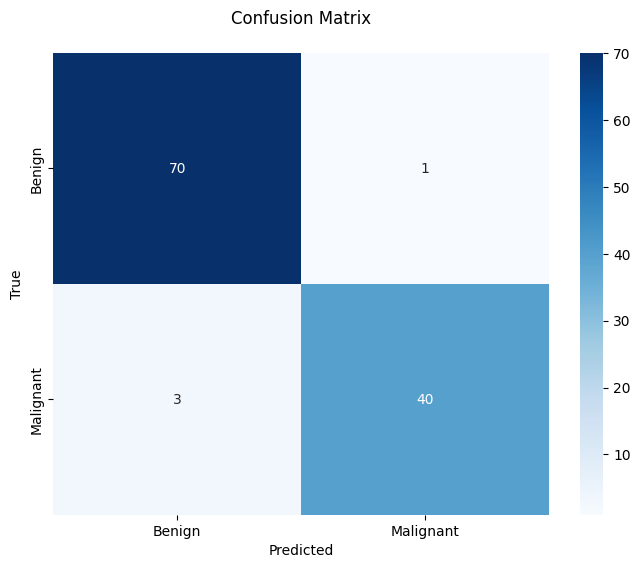

In [257]:
#Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, test_pred_gnb), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])

plt.title('Confusion Matrix\n')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [258]:
#Clasification report
print("Classification Report (NB): \n0: Benign \n1: Malignant\n")
print(classification_report(Y_test, test_pred_gnb))

Classification Report (NB): 
0: Benign 
1: Malignant

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# **Cross Validation**

In [260]:
#Evaluasi dengan Cross Validation
crv_gnb = cross_val_score(gnb, X, Y, cv=5, scoring='accuracy')

print("Cross Validation Score (NB):\n")
print("Score              : ", crv_gnb)
print("Mean Accuracy      : ", crv_gnb.mean())
print("Standard Deviation : ", crv_gnb.std())

Cross Validation Score (NB):

Score              :  [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
Mean Accuracy      :  0.9385188635305075
Standard Deviation :  0.014585994424363306
